In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
dataset_train_path = '/home/nata-brain/Documents/tcc/web-eye-tracker/public/training/1685126241.2630084natanael/train_data.csv'
dataset_session_path = '/home/nata-brain/Documents/tcc/web-eye-tracker/public/sessions/1685126241.2630084natanael/session_data.csv'

raw_dataset = pd.read_csv(dataset_train_path)
session_dataset = pd.read_csv(dataset_session_path)
dataset = raw_dataset
dataset_s = session_dataset.drop(['timestamp'], axis = 1)

display(dataset_s.head())

,left_iris_x,left_iris_y,right_iris_x,right_iris_y
0,405.850555,231.186356,354.501923,228.196136
1,407.114532,231.539841,355.974915,228.950607
2,407.976379,233.015640,356.671295,229.347351
3,408.378906,232.014603,356.412415,229.194199
4,408.041260,232.819061,356.285004,229.593658


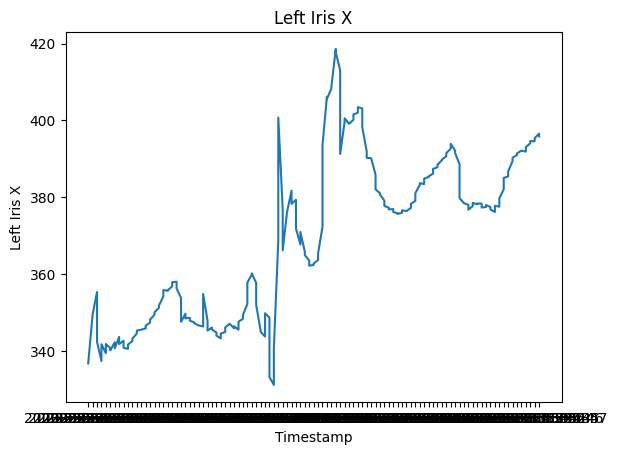

In [3]:
plt.plot(raw_dataset.timestamp, raw_dataset.left_iris_x)
plt.xlabel('Timestamp')
plt.ylabel('Left Iris X')
plt.title('Left Iris X')
plt.show()

In [4]:
print(raw_dataset.timestamp[0])

2023-5-26 15:34:5


In [5]:
from datetime import datetime
obj = datetime.strptime(raw_dataset.timestamp[0], "%Y-%m-%d %H:%M:%S")
print(obj.hour)
print(obj.minute)
print(obj.second)

15
34
5


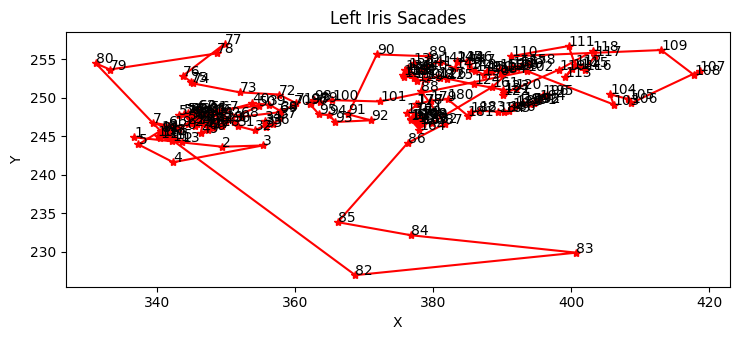

In [8]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x           = raw_dataset.left_iris_x
y           = raw_dataset.left_iris_y
datetime    = raw_dataset.timestamp

plt.plot(x, y, 'r*', linestyle = '-')
plt.title("Left Iris Sacades")
plt.xlabel('X')
plt.ylabel('Y')

i = 0

for xy in zip(x, y):
   i = i+1
   plt.annotate(f'{i}', xy)
plt.show()



In [48]:
import plotly.express as px

px.line(raw_dataset, y=["left_iris_x", "left_iris_y", "right_iris_x", "right_iris_y"], title="Left and Right Iris Position")
#px.line(raw_dataset, y="left_iris_y", title="Left Iris Position in Y")


In [14]:
x           = raw_dataset.left_iris_x
y           = raw_dataset.left_iris_y
datetime    = raw_dataset.timestamp

fig = px.scatter(raw_dataset, y = 'left_iris_x', x = 'timestamp', color = 'left_iris_x', symbol = 'left_iris_x')
fig.update_traces(marker_size = 10)
fig.show()